In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

In [2]:
df=pd.read_csv('time_series_19-covid-Confirmed.csv',parse_dates=True)

C:\Users\mjpbb\.conda\envs\main\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


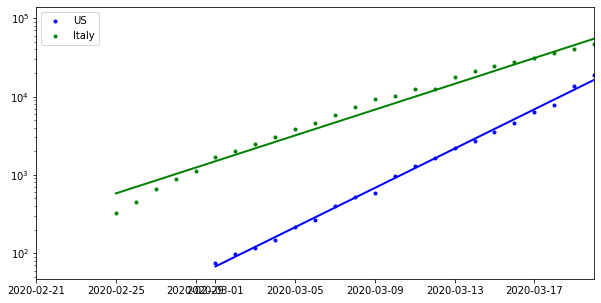

In [3]:
plt.figure(figsize=(10,5))
country=['US','Italy']#,'New York','Washington'
for c,color in zip(country,['blue','green']):
    tmp=df[df['Country/Region']==c].sum().drop(['Country/Region','Lat','Long','Province/State']).T
    time=pd.to_datetime(tmp.index).values
    counts=tmp.values.astype(np.float64)
    if c=='US':
        ind=np.argwhere(time==np.datetime64(datetime.date(2020, 3, 1)))[0][0]
    else:
        ind=np.argwhere(time==np.datetime64(datetime.date(2020, 2, 25)))[0][0]
    time=time[ind:]
    counts=counts[ind:]
    time_int=time.astype(np.int64)
    ref=time_int[0]
    time_int-=ref
    ref2=time_int.max()
    time_int=time_int/ref2
    plt.semilogy(time,counts,'.',color=color,label=c,linewidth=2)
    slope,intercept=np.polyfit(time_int,np.log10(counts+1),deg=1)
    y=10**(slope*time_int+intercept)
    plt.plot(time,y,color,linewidth=2)
    
plt.xlim([datetime.date(2020, 2, 21), datetime.date(2020, 3, 20)])
plt.legend()
plt.show()

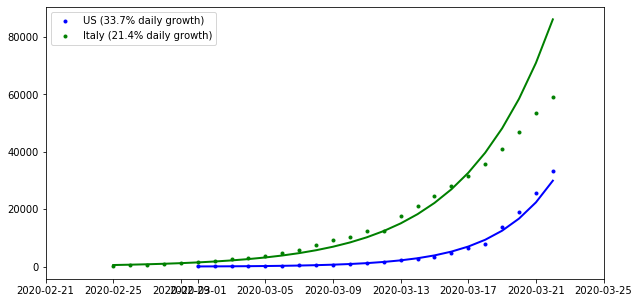

In [17]:
plt.figure(figsize=(10,5))
country=['US','Italy']#,'New York','Washington'
for c,color in zip(country,['blue','green']):
    tmp=df[df['Country/Region']==c].sum().drop(['Country/Region','Lat','Long','Province/State']).T
    time=pd.to_datetime(tmp.index).values[:-1]
    counts=tmp.values.astype(np.float64)[:-1]
    if c=='US':
        ind=np.argwhere(time==np.datetime64(datetime.date(2020, 3, 1)))[0][0]
    else:
        ind=np.argwhere(time==np.datetime64(datetime.date(2020, 2, 25)))[0][0]
    time=time[ind:]
    counts=counts[ind:]
    time_int=time.astype(np.int64)
    ref=time_int[0]
    time_int-=ref
    ref2=time_int.max()
    time_int=time_int/ref2
    slope,intercept=np.polyfit(time_int,np.log10(counts+1),deg=1)
    perc=np.exp(slope*np.log(10)*time_int[1])-1
    plt.plot(time,counts,'.',color=color,label=c+" ({:.1f}% daily growth)".format(100*perc),linewidth=2)
    y=10**(slope*time_int+intercept)
    plt.plot(time,y,color,linewidth=2)
    #plt.plot(time,np.exp(slope*time_int*np.log(10)+intercept*np.log(10)),'r')
plt.xlim([datetime.date(2020, 2, 21), datetime.date(2020, 3, 25)])
plt.legend()
plt.show()

In [13]:
np.exp(slope*np.log(10)*time_int[1])-1

0.33740398858042475